<a href="https://colab.research.google.com/github/Alejandro-lopez1/challenge-alura-telecom/blob/main/Challenge_telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Evasión de Clientes - Telecom X

Este notebook analiza los facotres que contribuyen a la evasión de clientes (churn) para ayudar a la empresa a reducir las bajas. El objetivo es realizar un análisis exploratorio y descubrir patrones clave.


In [4]:
#Importación de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [5]:
response = requests.get ('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
data = response.json()

#creamos el datafame
df = pd.DataFrame(data)


In [6]:
#verificación básica
print(df.shape)
print(df.columns)

(7267, 6)
Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')


In [7]:
#explorando las columnas del dataset
df.info() #tipos de datos+ nulos
df.dtypes #solo tipos de datos
df.columns #nombres de columnas
df.head() #primeras filas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [8]:
print(df.iloc[0])

customerID                                           0002-ORFBO
Churn                                                        No
customer      {'gender': 'Female', 'SeniorCitizen': 0, 'Part...
phone            {'PhoneService': 'Yes', 'MultipleLines': 'No'}
internet      {'InternetService': 'DSL', 'OnlineSecurity': '...
account       {'Contract': 'One year', 'PaperlessBilling': '...
Name: 0, dtype: object


In [9]:
#conociendo que hay diciconarios dentro de las listas, procedemos a expandir las columnas para obtener las variables que hay dentro
customer_df = df["customer"].apply(pd.Series)
phone_df = df["phone"].apply(pd.Series)
internet_df = df["internet"].apply(pd.Series)
account_df = df["account"].apply(pd.Series)

In [10]:
df_final = pd.concat([
    df.drop(columns=["customer", "phone", "internet", "account"]),
    customer_df,
    phone_df,
    internet_df,
    account_df
], axis=1)

#para ver todo desplegado
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7267 non-null   object
 1   Churn             7267 non-null   object
 2   gender            7267 non-null   object
 3   SeniorCitizen     7267 non-null   int64 
 4   Partner           7267 non-null   object
 5   Dependents        7267 non-null   object
 6   tenure            7267 non-null   int64 
 7   PhoneService      7267 non-null   object
 8   MultipleLines     7267 non-null   object
 9   InternetService   7267 non-null   object
 10  OnlineSecurity    7267 non-null   object
 11  OnlineBackup      7267 non-null   object
 12  DeviceProtection  7267 non-null   object
 13  TechSupport       7267 non-null   object
 14  StreamingTV       7267 non-null   object
 15  StreamingMovies   7267 non-null   object
 16  Contract          7267 non-null   object
 17  PaperlessBilli

In [11]:
#agrupación lógica de variables relacionadas con la evasión de clientes
variables_contrato = ["Contract", "PaperlessBilling", "PaymentMethod"]
variables_tiempo_dinero = ["tenure", "MontlyCharges", "TotalCharges"]
variables_servicio_internet = ["InternetService", "OnlineSecurity", "TechSupport"]

#lista de listas
grupos_columnas = [
    variables_contrato,
    variables_tiempo_dinero,
    variables_servicio_internet
]

In [12]:
import pandas as pd
df = pd.json_normalize(data)
print(df.columns)

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')


In [13]:
df_final.dtypes
df_final = pd.json_normalize(data)
print(df_final)

      customerID Churn customer.gender  customer.SeniorCitizen  \
0     0002-ORFBO    No          Female                       0   
1     0003-MKNFE    No            Male                       0   
2     0004-TLHLJ   Yes            Male                       0   
3     0011-IGKFF   Yes            Male                       1   
4     0013-EXCHZ   Yes          Female                       1   
...          ...   ...             ...                     ...   
7262  9987-LUTYD    No          Female                       0   
7263  9992-RRAMN   Yes            Male                       0   
7264  9992-UJOEL    No            Male                       0   
7265  9993-LHIEB    No            Male                       0   
7266  9995-HOTOH    No            Male                       0   

     customer.Partner customer.Dependents  customer.tenure phone.PhoneService  \
0                 Yes                 Yes                9                Yes   
1                  No                  No    

In [14]:
#verificando filas repetidas
duplicados = df_final.duplicated()
print(f"Filas duplicadas: {duplicados.sum()}")

Filas duplicadas: 0


In [15]:
#ver cuántos valores nulos hay por columna
print(df_final.isnull().sum())

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [16]:
#revisamos las listas para encontrar valores ausentes
print(df_final["Churn"].unique())
print(df_final["customer.gender"].unique())
print(df_final["phone.PhoneService"].unique())
print(df_final["internet.InternetService"].unique())

['No' 'Yes' '']
['Female' 'Male']
['Yes' 'No']
['DSL' 'Fiber optic' 'No']


In [17]:
df_final["Churn"] = df_final["Churn"].replace('', 'Desconocido')
print(df_final["Churn"].unique())

['No' 'Yes' 'Desconocido']


In [18]:
#eliminar espacios adelante y atrás de strings
df_final = df_final.applymap(lambda x: x.strip() if isinstance(x, str) else x)

<ipython-input-18-54d4de6fd64c>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_final = df_final.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [19]:
#verificando si aún hay valores vacíos
print("valores nulos:\n", df_final.isnull().sum())

# Verificar tipos de datos
print("\nTipos de datos:\n", df_final.dtypes)

# Revisar valores únicos en las principales columnas
print("\nValores únicos en Churn:", df_final["Churn"].unique())

valores nulos:
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

Tipos de datos:
 customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.

#Paso para crear "Cuentas_Diarias"
Asuminedo que la facturación mensual es por 30 días (promedio), lo vamos a hacer asi:


In [20]:
#verificamos el nombre de las listas ya que ahora son son diccionarios
print(df_final.columns)

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')


In [21]:
df_final["Cuentas_Diarias"] = pd.to_numeric(df_final["account.Charges.Monthly"], errors="coerce") / 30


In [22]:
#verificamos que se haya creado la columna "Cuentas_Diarias"
print(df_final.columns)


Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias'],
      dtype='object')


#Estandarización ya Transformación de datos

In [23]:
df_final["Churn_bin"] = df_final["Churn"].map({"Yes": 1, "No": 0})


In [24]:
#estandarizamos nombres de columnas:
df_final.rename(columns={
    "customerID": "ID_Cliente",
    "account.Charges.Monthly": "Facturacion_Mensual",
}, inplace=True)


In [25]:
#traducción de categorías
df_final["internet.InternetService"] = df_final["internet.InternetService"].replace({
    "DSL": "DSL",
    "Fiber optic": "Fibra Óptica",
    "No": "Sin Servicio"
})


NameError: name 'df_columns' is not defined

In [28]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Cliente                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [32]:
#agrupamos las columnas por el tipo de dato que contengan apra hacer un mejor análisis
numericas = df_final.select_dtypes(include=['int64', 'float64']).columns.tolist()
categoricas = df_final.select_dtypes(include='object').columns.tolist()

print("Numéricas: ", numericas)
print("Categóricas: ", categoricas)

Numéricas:  ['customer.SeniorCitizen', 'customer.tenure', 'Facturacion_Mensual', 'Cuentas_Diarias', 'Churn_bin']
Categóricas:  ['ID_Cliente', 'Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Total']


In [37]:
print(df_final[numericas].describe())
print(df_final[categoricas].describe())

       customer.SeniorCitizen  customer.tenure  Facturacion_Mensual  \
count             7267.000000      7267.000000          7267.000000   
mean                 0.162653        32.346498            64.720098   
std                  0.369074        24.571773            30.129572   
min                  0.000000         0.000000            18.250000   
25%                  0.000000         9.000000            35.425000   
50%                  0.000000        29.000000            70.300000   
75%                  0.000000        55.000000            89.875000   
max                  1.000000        72.000000           118.750000   

       Cuentas_Diarias    Churn_bin  
count      7267.000000  7043.000000  
mean          2.157337     0.265370  
std           1.004319     0.441561  
min           0.608333     0.000000  
25%           1.180833     0.000000  
50%           2.343333     0.000000  
75%           2.995833     1.000000  
max           3.958333     1.000000  
        ID_Cliente

In [34]:
for col in categoricas:
  print(f"\nDistribución de: {col}")
  print(df_final[col].value_counts())


Distribución de: ID_Cliente
ID_Cliente
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

Distribución de: Churn
Churn
No             5174
Yes            1869
Desconocido     224
Name: count, dtype: int64

Distribución de: customer.gender
customer.gender
Male      3675
Female    3592
Name: count, dtype: int64

Distribución de: customer.Partner
customer.Partner
No     3749
Yes    3518
Name: count, dtype: int64

Distribución de: customer.Dependents
customer.Dependents
No     5086
Yes    2181
Name: count, dtype: int64

Distribución de: phone.PhoneService
phone.PhoneService
Yes    6560
No      707
Name: count, dtype: int64

Distribución de: phone.MultipleLines
phone.MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

Distribución de: internet.InternetService
inte

In [35]:
print(df_final["account.Contract"].value_counts(normalize=True))

account.Contract
Month-to-month    0.551122
Two year          0.239851
One year          0.209027
Name: proportion, dtype: float64


In [36]:
print(df_final.groupby("Churn")["Facturacion_Mensual"].mean())

Churn
Desconocido    63.412277
No             61.265124
Yes            74.441332
Name: Facturacion_Mensual, dtype: float64


#Visualizamos con Matplotlib la variable que representa si un cliente se dio de baja o no.

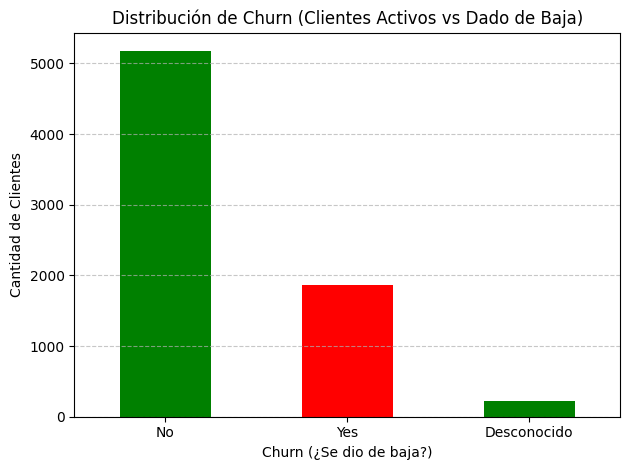

In [38]:
import matplotlib.pyplot as plt

df_final["Churn"].value_counts().plot(kind='bar', color=["green", "red"])
plt.title("Distribución de Churn (Clientes Activos vs Dado de Baja)")
plt.xlabel("Churn (¿Se dio de baja?)")
plt.ylabel("Cantidad de Clientes")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Ahora exploraremos cóm se distribuye la evasión y las variables categóricas, como género, tipo de contrato, método de pago...
Este análisis revelará patrones como, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, entre otros aspectos que ayudarán a orientar acciones estratégicas.


In [41]:
cat_cols = [
    "customer.gender",
    "account.Contract",
    "account.PaymentMethod"
]

print(df_final[cat_cols].nunique())  # Para ver cuántas categorías tiene cada una


customer.gender          2
account.Contract         3
account.PaymentMethod    4
dtype: int64


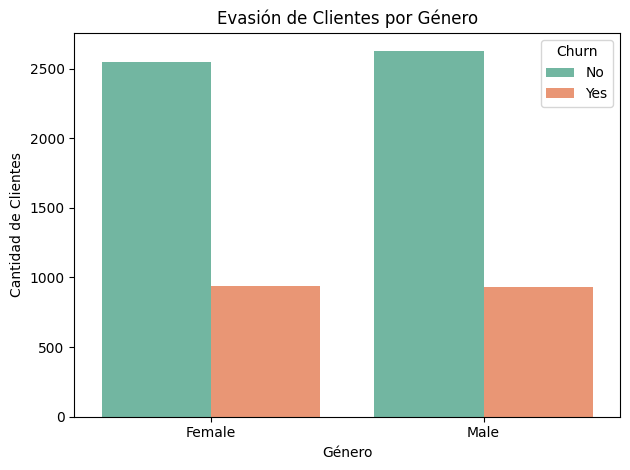

In [42]:
#evasión por género:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_final[df_final["Churn"].isin(["Yes", "No"])], x="customer.gender", hue="Churn", palette="Set2")
plt.title("Evasión de Clientes por Género")
plt.xlabel("Género")
plt.ylabel("Cantidad de Clientes")
plt.legend(title="Churn")
plt.tight_layout()
plt.show()


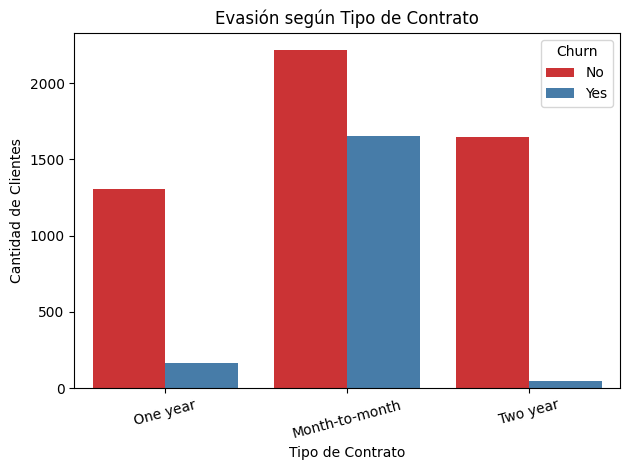

In [43]:
#evasión por tipo de contrato:
sns.countplot(data=df_final[df_final["Churn"].isin(["Yes", "No"])], x="account.Contract", hue="Churn", palette="Set1")
plt.title("Evasión según Tipo de Contrato")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Cantidad de Clientes")
plt.legend(title="Churn")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


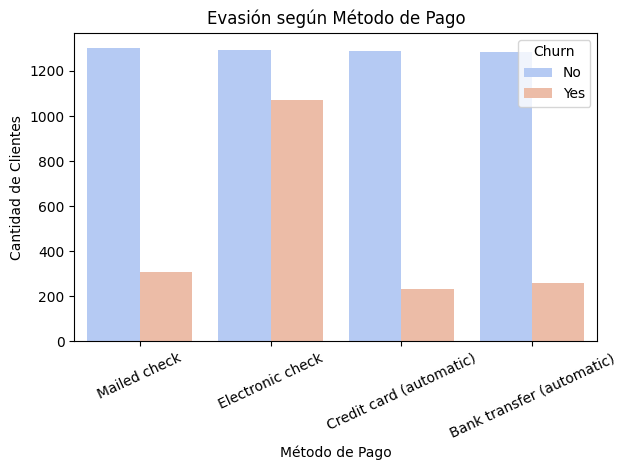

In [44]:
#evasión por método de pago:
sns.countplot(data=df_final[df_final["Churn"].isin(["Yes", "No"])], x="account.PaymentMethod", hue="Churn", palette="coolwarm")
plt.title("Evasión según Método de Pago")
plt.xlabel("Método de Pago")
plt.ylabel("Cantidad de Clientes")
plt.legend(title="Churn")
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()


In [45]:
#análisis en formato tabla:
tabla = df_final[df_final["Churn"].isin(["Yes", "No"])].groupby("account.Contract")["Churn"].value_counts(normalize=True).unstack()
print(tabla)


Churn                   No       Yes
account.Contract                    
Month-to-month    0.572903  0.427097
One year          0.887305  0.112695
Two year          0.971681  0.028319


#Objetivo: visualizar distribuciones numéricas separadas por churn
para esto vamos a utilizar histogramas, boxplots y KDE plots para comparar cómo se comportan estas variables en clientes que se fueron (yes) vs. los que se quedaron (no).

In [46]:
#variables a analizar:
num_cols = [
    "account.Charges.Total",    # Total gastado
    "account.Charges.Monthly",  # Facturación mensual
    "customer.tenure",          # Tiempo como cliente
    "Cuentas_Diarias"           # Tu columna derivada
]


In [55]:
print("Columnas disponibles:")
print(df_final.columns.tolist())

print("\nColumnas numéricas detectadas:")
print(num_cols)

num_cols = [col for col in num_cols if col in df_final.columns]

Columnas disponibles:
['ID_Cliente', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'Facturacion_Mensual', 'account.Charges.Total', 'Cuentas_Diarias', 'Churn_bin']

Columnas numéricas detectadas:
['account.Charges.Total', 'account.Charges.Monthly', 'customer.tenure', 'Cuentas_Diarias']


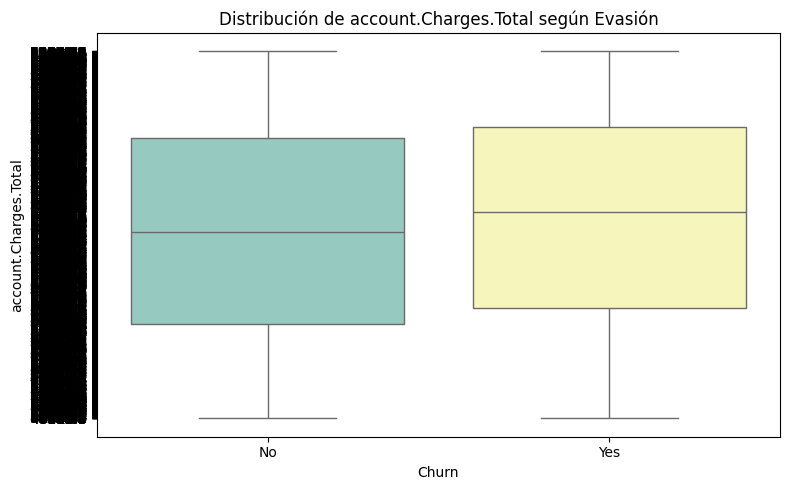

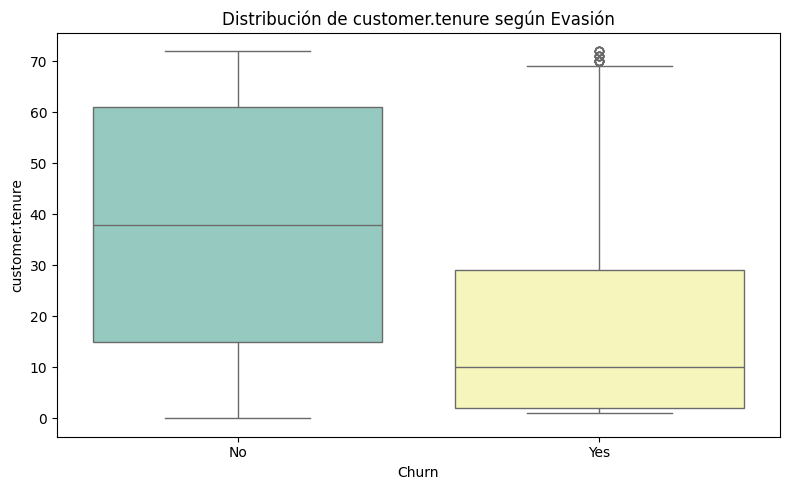

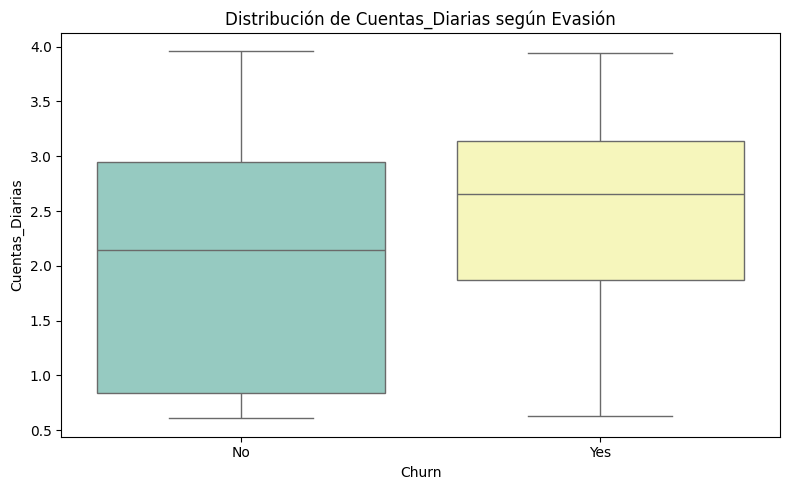

In [56]:
for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(
        data=df_final[df_final["Churn"].isin(["Yes", "No"])],
        x="Churn",
        y=col,
        hue="Churn",
        palette="Set3",
        dodge=False
    )
    plt.title(f"Distribución de {col} según Evasión")
    plt.xlabel("Churn")
    plt.ylabel(col)
    plt.legend([], [], frameon=False)
    plt.tight_layout()
    plt.show()



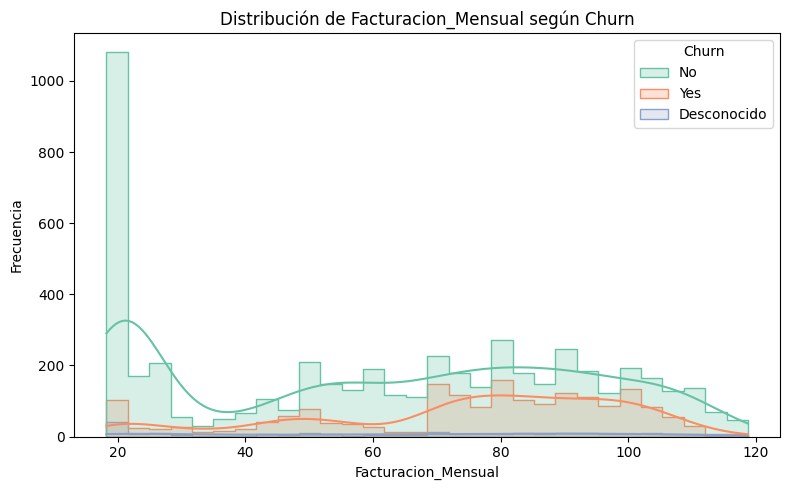

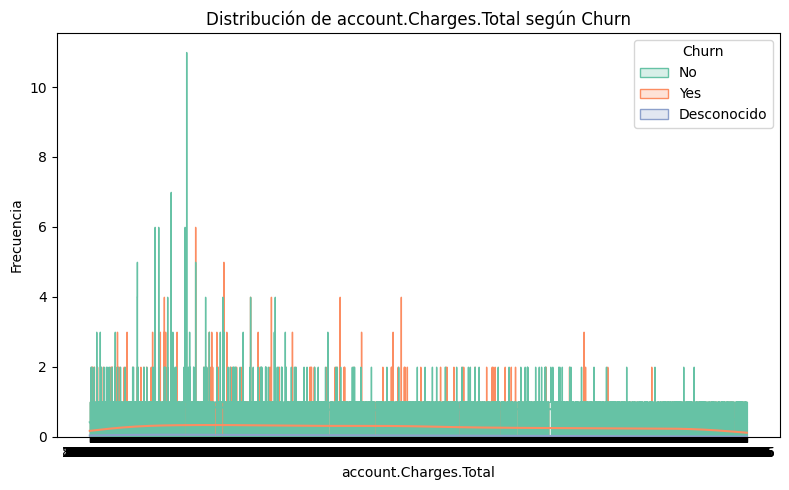

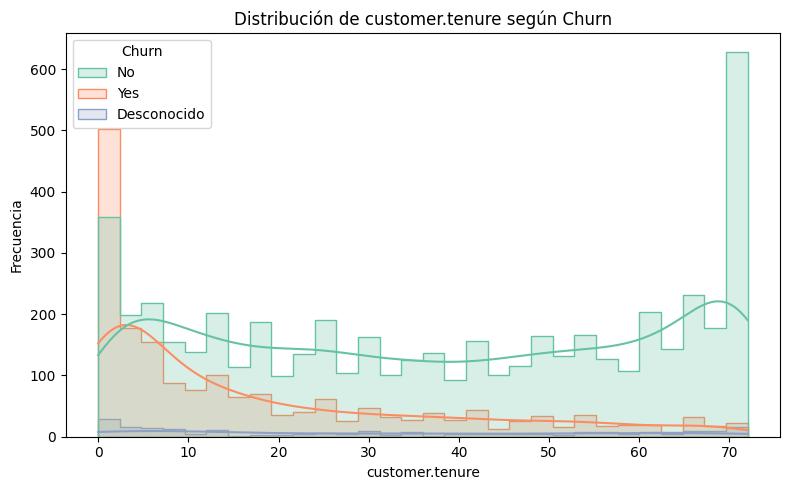

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de columnas numéricas a graficar
cols = ["Facturacion_Mensual", "account.Charges.Total", "customer.tenure"]

# Histogramas separados por churn
for col in cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df_final, x=col, hue="Churn", kde=True, element="step", palette="Set2", bins=30)
    plt.title(f"Distribución de {col} según Churn")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()



In [58]:
print(df_final.columns.tolist())

['ID_Cliente', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'Facturacion_Mensual', 'account.Charges.Total', 'Cuentas_Diarias', 'Churn_bin']


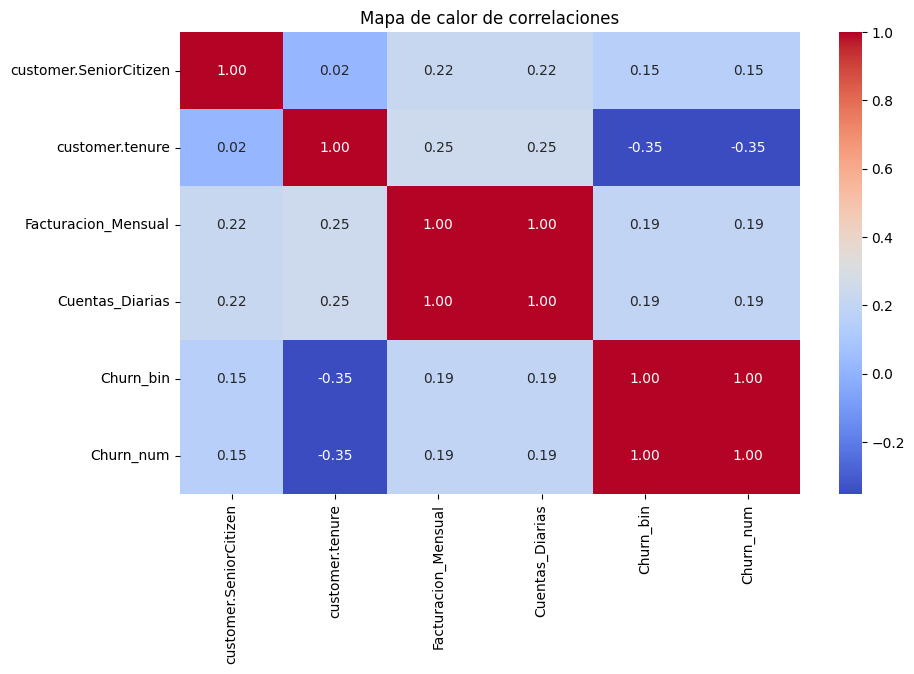

In [60]:
import numpy as np

df_final["Churn_num"] = df_final["Churn"].map({"Yes": 1, "No": 0})

# Seleccionar solo columnas numéricas
num_df = df_final.select_dtypes(include=np.number)

# Calcular y graficar la correlación
plt.figure(figsize=(10, 6))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlaciones")
plt.show()


Para comparar cómo s distribuyen variables numéricas entre clientes que cancelaron y los que no, usaremos gráficos que muestren claramente diferencias y dispersiones.

<ipython-input-64-974916f63210>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='Churn', y='Facturacion_Mensual', palette='Set2')


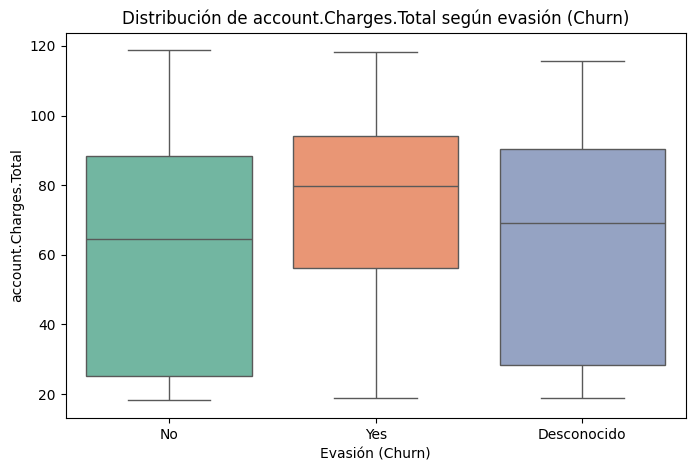

<ipython-input-64-974916f63210>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='Churn', y='Facturacion_Mensual', palette='Set2')


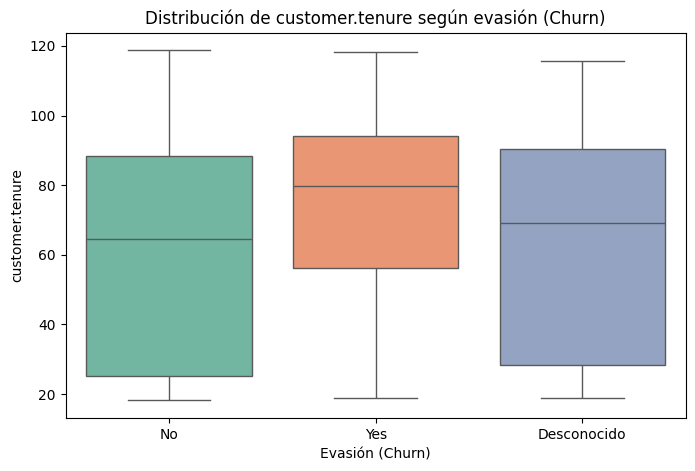

<ipython-input-64-974916f63210>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='Churn', y='Facturacion_Mensual', palette='Set2')


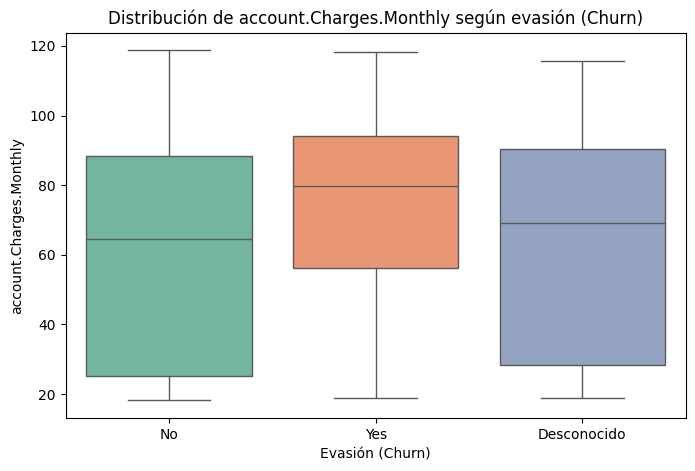

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['account.Charges.Total', 'customer.tenure', 'account.Charges.Monthly']

for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_final, x='Churn', y='Facturacion_Mensual', palette='Set2')
    plt.title(f'Distribución de {col} según evasión (Churn)')
    plt.xlabel('Evasión (Churn)')
    plt.ylabel(col)
    plt.show()


#INFROME FINAL - ANÁLISIS DE EVASIÓN DE CLIENTES (CHURN)
#1: Introducción:
El presente análisis tien como objetivo principal identificar patrones y factores que influyen en la evasión de clientes (Churn) en una empresa de servicios. Entender por qué los clientes se dan de baja permite a las compañías anticipar y prevenir estas salidas, reduciendo pérdidas económicas y fortalecienco la fidelización.
A través de un enfoque meramente exploratorio, se analizaron datos relacionados con el perfil del cliente, sus servicios contratados y el comportamiento y el comportamiendo de la facturación.

#2: Limpieza y Tratamiento de Datos
Se realizaron los siguientes pasos:
  Importación de datos desde una API, los cuales estaban en formato json.
  Revisión de valores faltantes y eliminación o imputación según el caso.
  Renombrado de columnas para mayor claridad (por ejemplo, account.Charges.Monthly pasó a Facturacion_Mensual)
  Conversión de variables categóricas como "yes/no" a valores binarios (1 y 0) para facilitar el análsis.
  Traducción de columnas clave al español para mejor interpretación por parte de los stakeholders.


#3: Análisis Exploratorio de Datos (EDA)
Distribución de la evasión: Se observó que  aproximadamente el 26% de los clientes abandonaron el servicio. Esto indica una tasa de Churn significativa.

Se utilizaron gráficos de barra y conteo para visualizar esta proporción.

Variables categóricas vs. Evasión
Se analizaron variables como:
  Genero
  Tipo de contrato
  Método de pago
  Servicio de internet

Algunos patrones observados:
  Clientes con contratos mensuales presentaron una mayor tasa de evasión.
  Aquellos que no utilizan servicios de seguridad online o soporte técnico tienden a abandonar más.

Variables numéricas vs. evasión
Mediante diagramas de caja (boxplots) se observaron diferencias importantes en:
  Facturación mensual: Los clientes que pagan más no necesariamente son más fieles.
  Tenencia (tiempo con la empresa): Los clientes nuevos son los que más se dan de baja.


#4: Conclusiones e Insights
Los análisis sugieren que el **tipo de contrato** y la **duración del cliente con la empresa** son factores críticos en la evasión.

La mayoría de las bajas provienen de:
  Clientes con contratos **mensuales**.
  Usuarios con **poca tenencia** y bajo uso de **servicios adicionales**.

La facturación mensual por sí sola **no es un buen predictor**, pero combinada con la duración del cliente, puede aportar mayor poder predictivo.

#5: Recomendaciones Estratégicas:
**Fidelización Temprana**: Crear estrategias de retención para los primeros meses, como beneficios o descuentos por permanencia.
**Promocionar Servicios Adicionales**, como seguridad, soporte técnico y respaldo de datos.
**Migrar a Contratos Más Largos** (trimestrales o anuales) con incentivos para reducir la rotación.
**Campañas de Prevención** enfocadas en perfiles con mayor riesgo de evasión (clientes nuevos con contrato mensual)

#Cierre:
Este análisis demuestra cómo el uso estratégico de datos puede aportar insights valiosos para la toma de desiciones en áreas de atención al cliente, marketing y producto. Con una cultura basada en datos, es posible reducir la evasión y mejorar la experiencia del cliente desde el primer contacto.